In [11]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [12]:
plt.rcParams['figure.figsize'] = (17, 5)  
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

In [13]:
opt_std =  {1:1.097324009878543,
            2:1.097324042581347,
            4: 0.5710655156439823,
            8: 0.28754191240507265,
            16: 0.14552024595543614,
            32: 0.07439700765663292,
            64: 0.03654101726025044,
            128: 0.018262391329213392,
            256: 0.009136370875837834,
            512: 0.004570016186845779,
            1024: 0.0022857004460788742,}


degree_step = {
            32: 10,
            64: 10,
            128: 50,
            256: 50,
            512: 100,
            1024: 200,    
}

# 1) Grid search of the optimal kernel width by finding a LOCAL minimum of the equivariance error

### Goals:
* check the robustness of the  minimum with respect to the number of neighbors of the graph.
* compare these results to the ones obtained by first setting the number of neighbors to 50, and then finding the kernel width such that min(weights = 0.1) __here under__

In [14]:
dic4 = pickle.load( open( "grid_search.pickle", "rb" ) )

In [15]:
n_neighbors = np.linspace(20, 100, 5, dtype=np.int)

In [16]:
def plot_4(dic):
    for nside in dic.keys():
        min_std = opt_std[nside]/10
        max_std = opt_std[nside]*10
        kernels = np.logspace(np.log10(min_std), np.log10(max_std), 20)


        for N in dic[nside].keys():
            plt.plot(kernels, dic[nside][N], '-o', label="n_neighbors = {0:0.0f}".format(N))
            j = np.argmin(dic[nside][N])
            plt.plot(kernels[j], dic[nside][N][j], 'rs', markersize=15)
        plt.legend()
        plt.xlabel('Kernel width', fontdict=font)
        plt.ylabel('Equivariance Error', fontdict=font)
        plt.title('50 neighbors on HEALPix, nside={}'.format(nside), fontdict=font)
        plt.grid()
        plt.show()

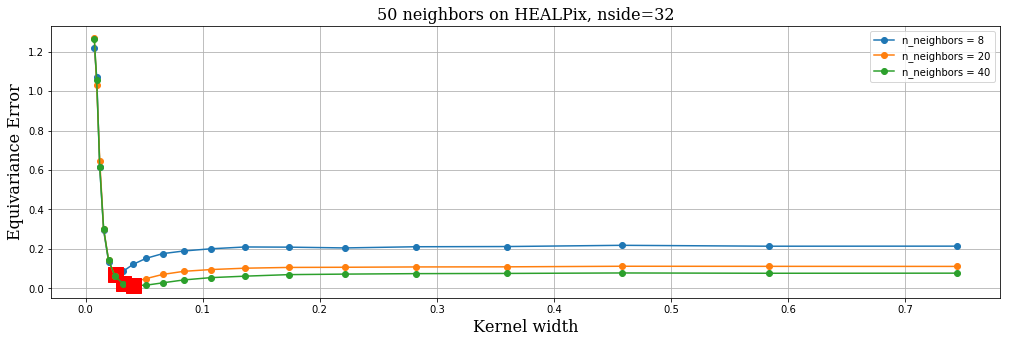

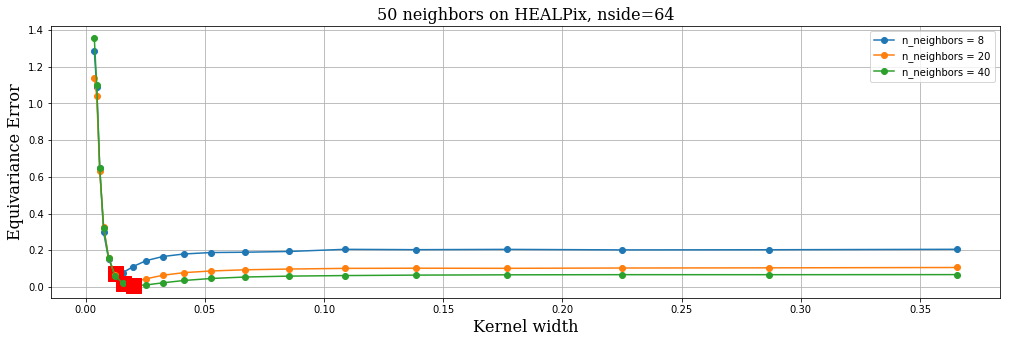

In [17]:
plot_4(dic4)

# 3) Equivariance Error by degree

In [23]:
def plot_deepsphere(dic, title):
    for nside in dic.keys():
        min_std = opt_std[nside]/10
        max_std = opt_std[nside]*10
        kernels = np.logspace(np.log10(min_std), np.log10(max_std), 5)


        step = degree_step[nside]
        n = len(dic[nside])
        plt.plot(np.arange(n)*step, dic[nside], '-o', label="nside = {0:0.0f}".format(nside))

        plt.legend()
    plt.xlabel('Degree', fontdict=font)
    plt.ylabel('Equivariance Error', fontdict=font)
    plt.title(title, fontdict=font)
    plt.grid()
    plt.show()

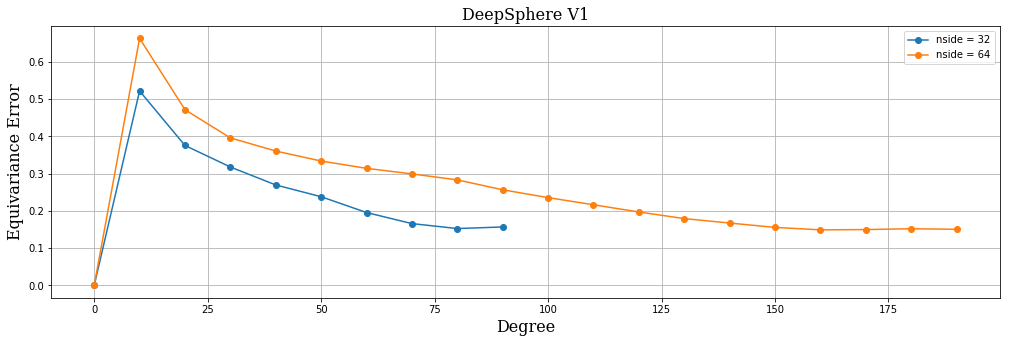

In [28]:
dic2 = pickle.load( open( "V1 - ||Lf||.pickle", "rb" ) )
plot_deepsphere(dic2, "DeepSphere V1")

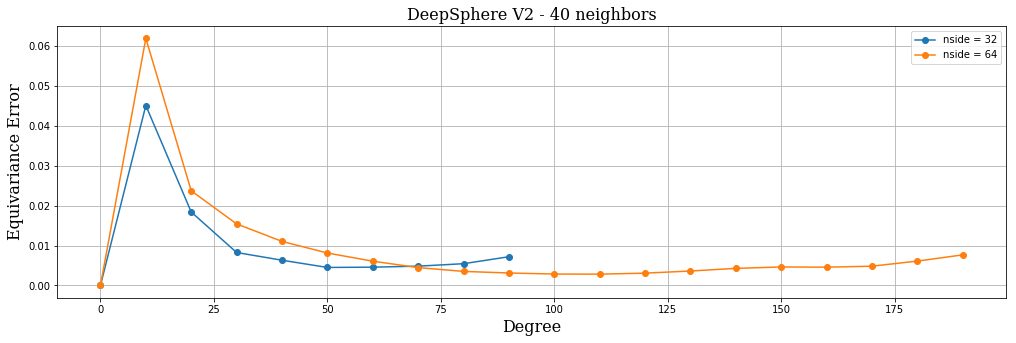

In [34]:
dic3 = pickle.load( open( "V2 - 40 neighbors - ||Lf||.pickle", "rb" ) )
plot_deepsphere(dic3, "DeepSphere V2 - 40 neighbors")

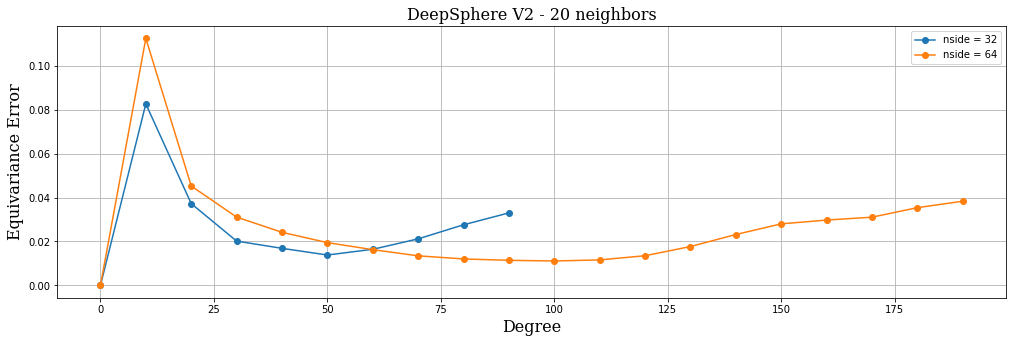

In [35]:
dic3 = pickle.load( open( "V2 - 20 neighbors - ||Lf||.pickle", "rb" ) )
plot_deepsphere(dic3, "DeepSphere V2 - 20 neighbors")

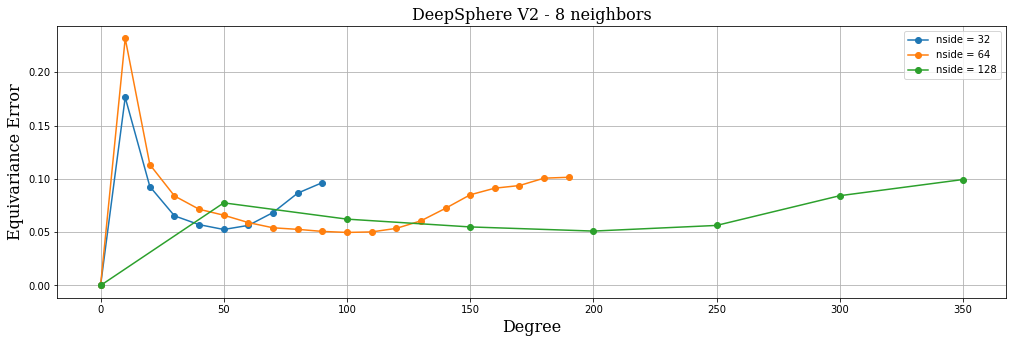

In [36]:
dic3 = pickle.load( open( "V2 - 8 neighbors - ||Lf||.pickle", "rb" ) )
plot_deepsphere(dic3, "DeepSphere V2 - 8 neighbors")

# 4) Khasanova-Frossard

In [38]:
degree_step = {32: 1,
               64: 6,}

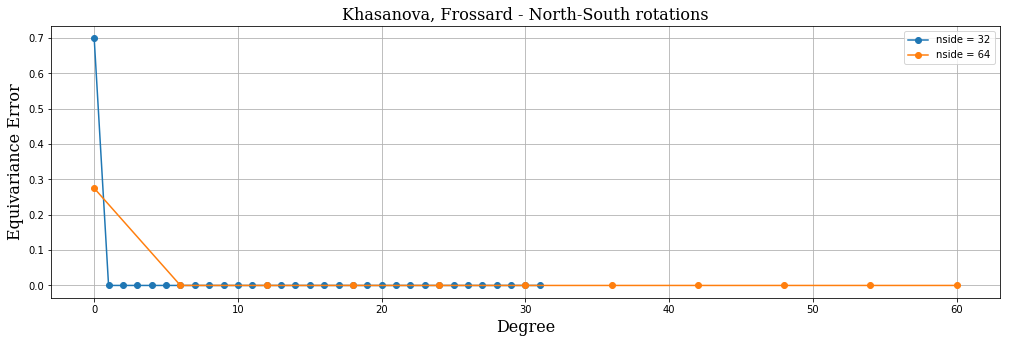

In [40]:
dic3 = pickle.load( open( "KF_NS.pickle", "rb" ) )
plot_deepsphere(dic3, "Khasanova, Frossard - North-South rotations")

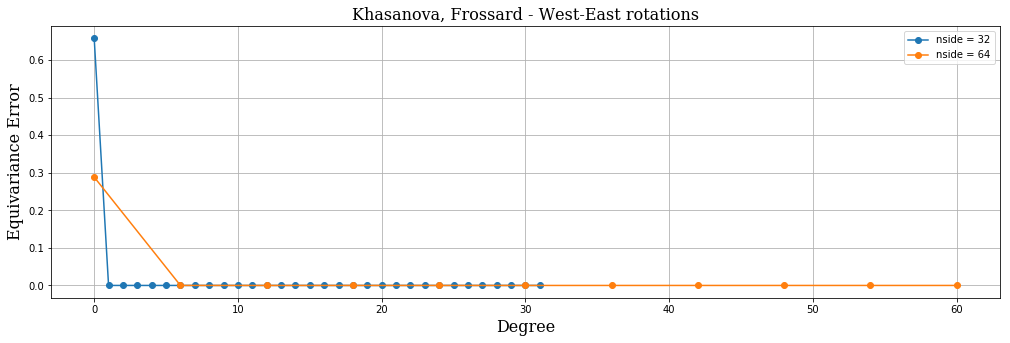

In [44]:
dic3 = pickle.load( open( "KF_WE.pickle", "rb" ) )
plot_deepsphere(dic3, "Khasanova, Frossard - West-East rotations")

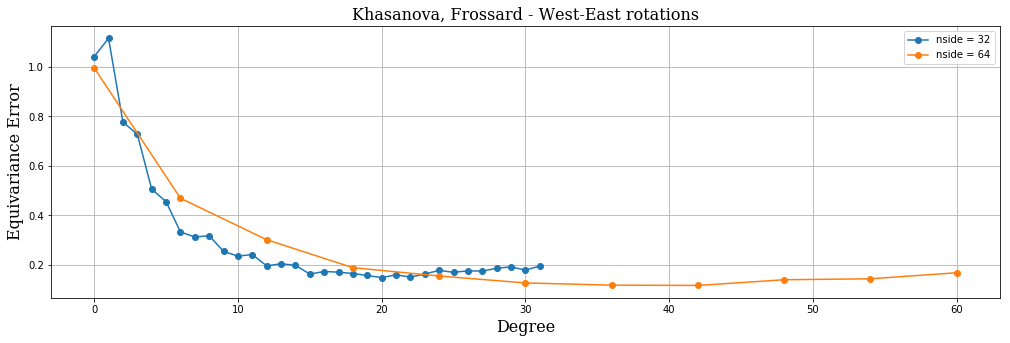

In [43]:
dic3 = pickle.load( open( "KF_random.pickle", "rb" ) )
plot_deepsphere(dic3, "Khasanova, Frossard - West-East rotations")